<a href="https://colab.research.google.com/github/wjng-3393/Training-ground/blob/main/Project_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv("/content/fraud detection.csv")

In [40]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [42]:
missing = data.isnull().sum()
missing

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [43]:
dupli =  data.duplicated().sum()
dupli

np.int64(0)

In [44]:
# Iterate through each column to count occurrences of zero values
for column in data.columns:
    zero_count = (data[column] == 0).sum()  # Calculate the number of zeros in the current column
    print(f"Zeros in column '{column}': {zero_count}")  # Output the zero count for each column

Zeros in column 'step': 0
Zeros in column 'type': 0
Zeros in column 'amount': 0
Zeros in column 'nameOrig': 0
Zeros in column 'oldbalanceOrg': 342214
Zeros in column 'newbalanceOrig': 580275
Zeros in column 'nameDest': 0
Zeros in column 'oldbalanceDest': 437134
Zeros in column 'newbalanceDest': 406914
Zeros in column 'isFraud': 1047433
Zeros in column 'isFlaggedFraud': 1048575


In [45]:
# Remove transactions with zero amounts as they represent redundant or invalid entries
data = data[data['amount'] > 0].copy()

In [46]:
# Extract unique values for categorical columns to explore their distinct categories
unique_values_type = data['type'].unique()
unique_values_isFraud = data['isFraud'].unique()
unique_values_isFlaggedFraud = data['isFlaggedFraud'].unique()

# Display the unique values for each column
print("Unique values in 'type' column:", unique_values_type)
print("Unique values in 'isFraud' column:", unique_values_isFraud)
print("Unique values in 'isFlaggedFraud' column:", unique_values_isFlaggedFraud)

Unique values in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Unique values in 'isFraud' column: [0 1]
Unique values in 'isFlaggedFraud' column: [0]


In [47]:
fraud_count = data['isFraud'].value_counts()
fraud_count

,count
isFraud,
0,1047433
1,1142


/tmp/ipython-input-48-69132117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['isFraud'], y=data[feature], ax=axes[i], palette="Set2")
/tmp/ipython-input-48-69132117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['isFraud'], y=data[feature], ax=axes[i], palette="Set2")
/tmp/ipython-input-48-69132117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['isFraud'], y=data[feature], ax=axes[i], palette="Set2")
/tmp/ipython-input-48-69132117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

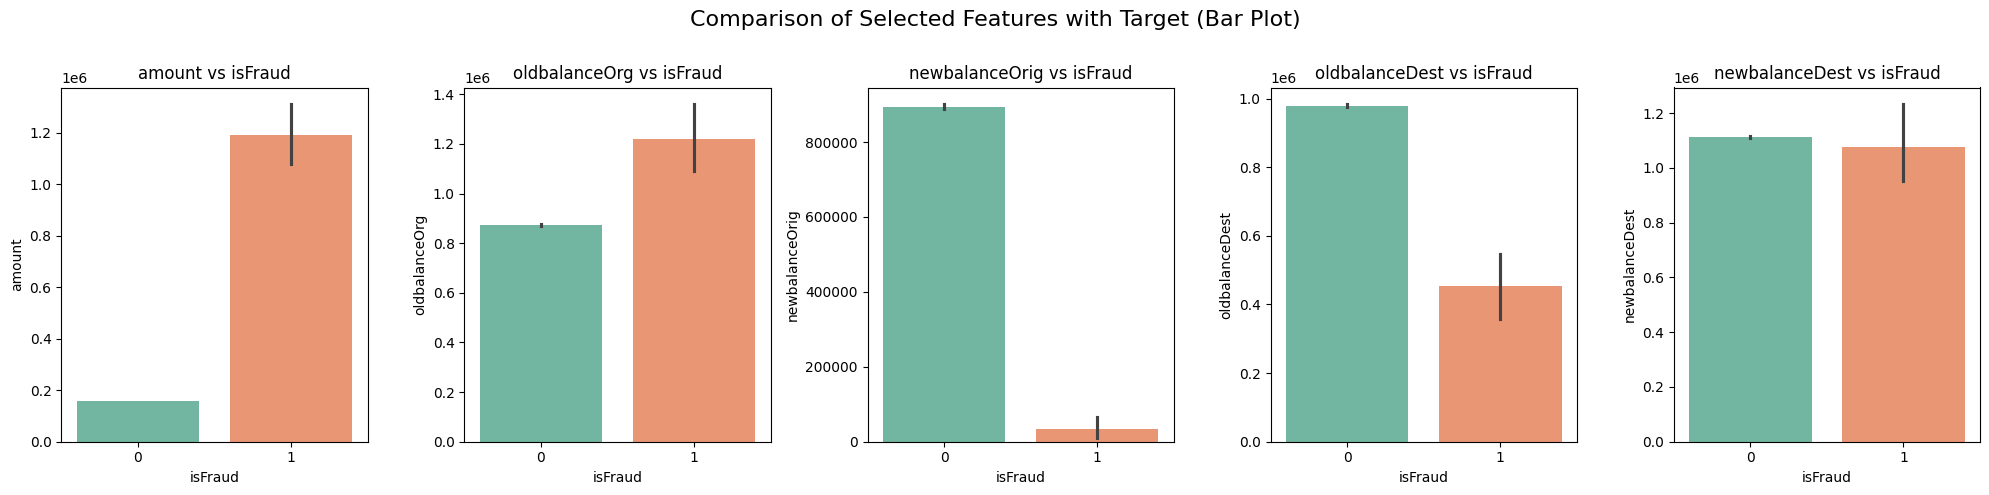

In [48]:
# Correct way to select columns
selected_features = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Create subplots
fig, axes = plt.subplots(1, len(selected_features.columns), figsize=(20, 5))

# Loop through each selected feature
for i, feature in enumerate(selected_features.columns):
    sns.barplot(x=data['isFraud'], y=data[feature], ax=axes[i], palette="Set2")
    axes[i].set_title(f'{feature} vs isFraud')
    axes[i].set_xlabel('isFraud')
    axes[i].set_ylabel(feature)

plt.suptitle("Comparison of Selected Features with Target (Bar Plot)", fontsize=16)
plt.tight_layout()
plt.show()

In [49]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K+', '1000K+']

# Bin the transaction amounts
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

# Calculate fraud rate per bin (in a separate DataFrame)
fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(
    columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}
)
fraud_rate['Fraud Rate'] = fraud_rate['Fraudulent Transactions'] / fraud_rate['Total Transactions']

# Reset index for readability
fraud_rate = fraud_rate.reset_index()

# Display fraud rate per bin
print("Fraud Rate per Bin:")
print(fraud_rate)

Fraud Rate per Bin:
  amount_bin  Total Transactions  Fraudulent Transactions  Fraud Rate
0      0-100                2509                        0    0.000000
1    100-500                9957                       14    0.001406
2     500-1K               12368                        2    0.000162
3      1K-5K               98410                       20    0.000203
4     5K-10K              103278                       20    0.000194
5    10K-50K              237858                      167    0.000702
6   50K-100K              111586                       86    0.000771
7      100K+              454704                      500    0.001100
8     1000K+               17905                      333    0.018598


/tmp/ipython-input-49-3673604599.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(


In [50]:
# Define weights for each transaction amount bin
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}

# Assign bin weights to the data DataFrame
data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

/tmp/ipython-input-51-2544541981.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')


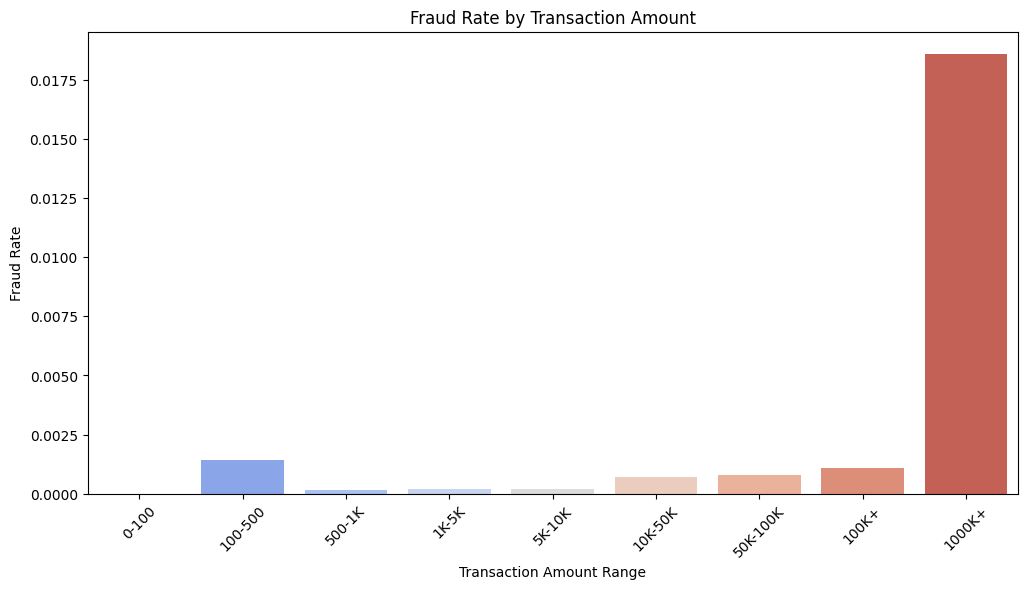

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')

plt.title('Fraud Rate by Transaction Amount')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

In [52]:
selected_features.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0
3,181.00,181.0,0.00,21182.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0


In [53]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_bin,bin_weight
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,5K-10K,1.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1K-5K,1.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,100-500,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,100-500,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,10K-50K,1.0


In [54]:
data=data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

In [55]:
#split into features and target
X=data.drop("isFraud", axis=1)
y=data['isFraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
clf= DecisionTreeClassifier(criterion='gini', random_state=42)

In [66]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
y_pred=clf.predict(X_test)

In [68]:
accuracy=accuracy_score(y_test, y_pred) #evaluate accuracy of the model
print(f"Accuracy: {accuracy:2f}")

Accuracy: 0.999352


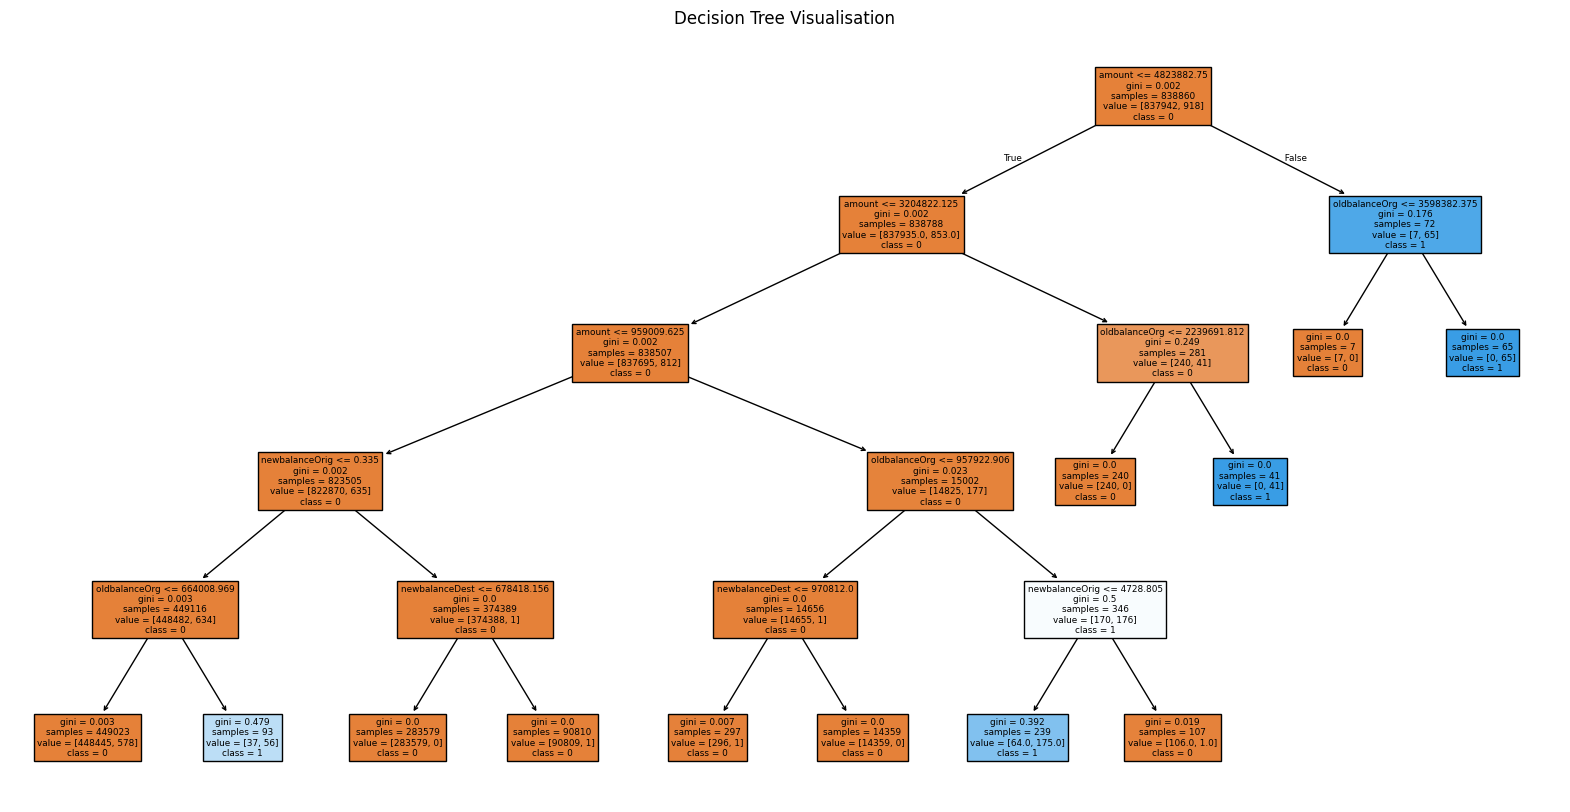

In [61]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Visualisation")
plt.show()

In [62]:
selected_features.head(10)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.00,160296.36,0.0,0.00
1,1864.28,21249.00,19384.72,0.0,0.00
2,181.00,181.00,0.00,0.0,0.00
3,181.00,181.00,0.00,21182.0,0.00
4,11668.14,41554.00,29885.86,0.0,0.00
5,7817.71,53860.00,46042.29,0.0,0.00
6,7107.77,183195.00,176087.23,0.0,0.00
7,7861.64,176087.23,168225.59,0.0,0.00
8,4024.36,2671.00,0.00,0.0,0.00
9,5337.77,41720.00,36382.23,41898.0,40348.79


In [63]:
def insert_data(amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest):
  new_data=pd.DataFrame([{
    amount,
    oldbalanceOrg,
    newbalanceOrig,
    oldbalanceDest,
    newbalanceDest}])
  prediction = clf.predict(new_data)
  if prediction[0] ==1:
    print('Most likely scam')
  else:
    print('Most likely not scam')
  return prediction

In [64]:
selected_features=insert_data(3000, 10000, 7000, 50000, 70000)

Most likely not scam


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


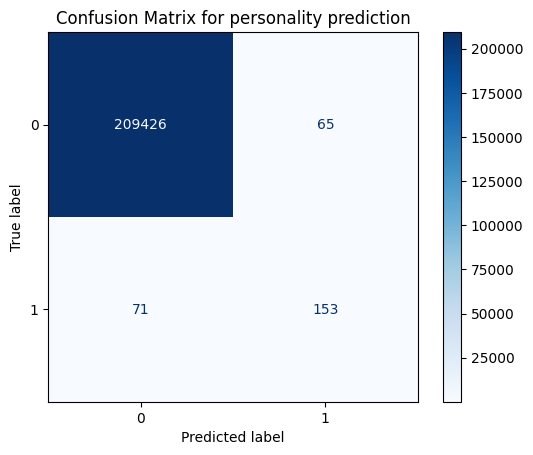

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for personality prediction")
plt.show()

In [ ]:
#Dashboards
#Gradio=user interface
#plotly
#bokeh python